In [3]:
## data of this code can be downloaded from the following link:
#https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset/code?datasetId=877335&sortBy=voteCount    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

In [11]:
#reading data
dataset = pd.read_csv("Groceries_dataset.csv")
#Member_number is unique for each customer. Date is date of the transaction,
#itemDescription is the product bought for this date.
print(dataset.head())
print(dataset.shape)
#################################
#checking missing values
nan_values = dataset.isna().sum()
print(nan_values)

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
(38765, 3)
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [7]:
##Basket analysis: we can see the bought products of clients for every day
client_basket=dataset.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
print(client_basket)
## we can see the bought products of clients for every day withot client number
clinet_basket2 = [a[1]['itemDescription'].tolist() for a in list(dataset.groupby(['Member_number','Date']))]
print(clinet_basket2[0:10])

Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object
[['sausage', 'whole milk', 'semi-finished bread', 'yo

In [12]:
#Converting Date into datetime type
Date=dataset.set_index(['Date'])
Date.index=pd.to_datetime(Date.index, infer_datetime_format= True)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

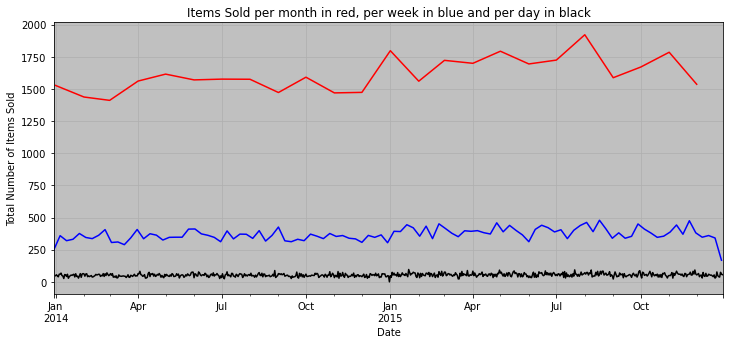

In [13]:
## data analysis
#Items Sold 
fig1 = plt.figure("Figure 1")
ax = plt.axes()
ax.set_facecolor('silver')
Date.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='black').set(xlabel="Date", ylabel="Total Number of Items Sold")
Date.resample("W")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Total Number of Items Sold")
Date.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='red',title="Items Sold per month in red, per week in blue and per day in black").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

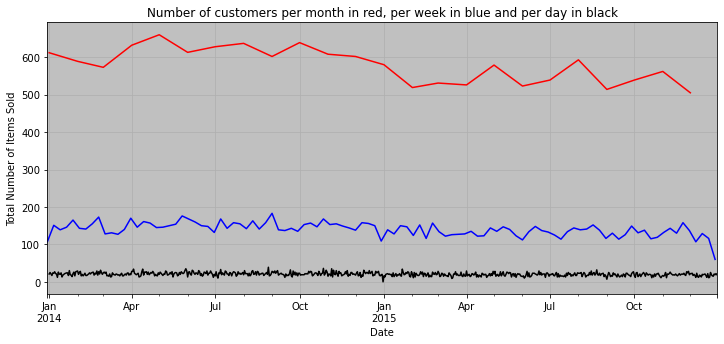

In [14]:
#Number of customers
fig2 = plt.figure("Figure 2")
ax = plt.axes()
ax.set_facecolor('silver')
Date.resample('D')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='black').set(xlabel="Date", ylabel="Number of customers")
Date.resample('W')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Number of customers")
Date.resample('M')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='red',title="Number of customers per month in red, per week in blue and per day in black").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Sale per customer')]

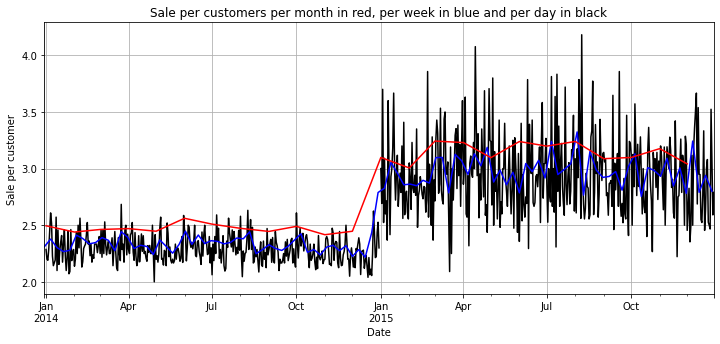

In [15]:
#sale per customer
fig3 = plt.figure("Figure 3")
ax = plt.axes()
day_ratio = Date.resample("D")['itemDescription'].count()/Date.resample('D')['Member_number'].nunique()
day_ratio.plot(figsize=(12,5), grid=True,
color='black').set(xlabel="Date", ylabel="Sale per customer")
week_ratio = Date.resample("W")['itemDescription'].count()/Date.resample('W')['Member_number'].nunique()
week_ratio.plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Sale per customer")
month_ratio = Date.resample("M")['itemDescription'].count()/Date.resample('M')['Member_number'].nunique()
month_ratio.plot(figsize=(12,5), grid=True,
color='red', title = "Sale per customers per month in red, per week in blue and per day in black").set(xlabel="Date", ylabel="Sale per customer")


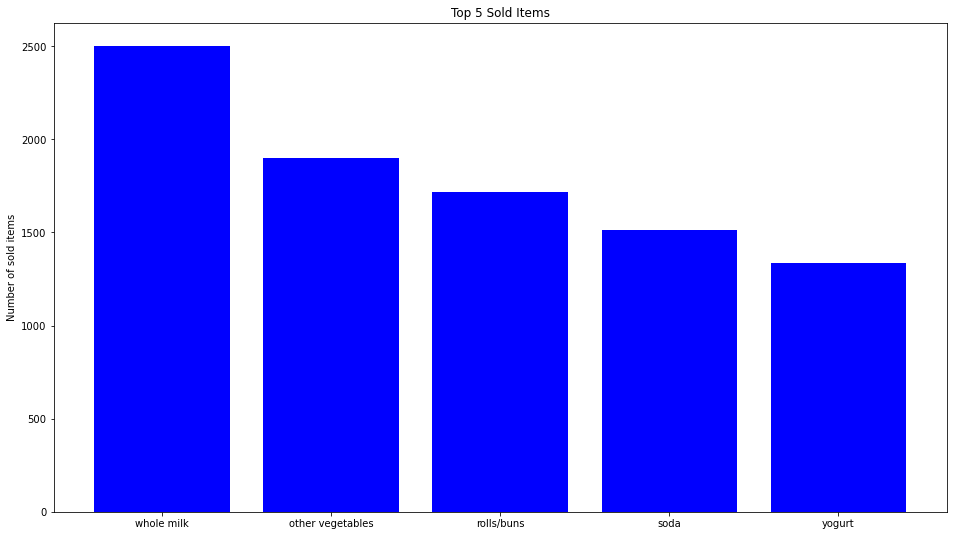

In [16]:
#5 best seller items 
Item_distr = dataset.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(5)
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color = 'blue')
plt.title("Top 5 Sold Items")
plt.ylabel("Number of sold items")
plt.xticks(x_pos, bars)
plt.show()

In [23]:
##Data preaparation and modeling
## before modeling, transcastion must be one-hot
Transactions = dataset.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
Transactions.head()
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1
Transactions = Transactions.iloc[:, 1:Transactions.shape[1]].applymap(one_hot_encoder)
# Transactions.head()
##associate learning 1: apriori
frequent_items1 = apriori(Transactions, min_support=0.027, use_colnames=True, max_len=3).sort_values(by='support')
frequent_items1.head(10)
results1 = association_rules(frequent_items1, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
results1 = results1[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
results1.head(100)

,antecedents,consequents,support,confidence,lift
629,(sausage),"(yogurt, rolls/buns)",0.035659,0.173101,1.554717
624,"(yogurt, rolls/buns)",(sausage),0.035659,0.320276,1.554717
216,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
221,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
627,(yogurt),"(rolls/buns, sausage)",0.035659,0.126020,1.530298
...,...,...,...,...,...
1008,"(rolls/buns, whole milk)",(sausage),0.048743,0.272989,1.325167
805,(whole milk),"(yogurt, bottled water)",0.040277,0.087906,1.323001
800,"(yogurt, bottled water)",(whole milk),0.040277,0.606178,1.323001
725,"(rolls/buns, bottled beer)",(whole milk),0.038225,0.605691,1.321939


In [22]:
##associate learning 2: fpgrowth
frequent_items2=fpgrowth(Transactions, min_support=0.027, use_colnames=True, max_len=3).sort_values(by='support')
frequent_items2.head(10)
results2 = association_rules(frequent_items2, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
results2 = results2[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
results2.head(10)

,antecedents,consequents,support,confidence,lift
627,(sausage),"(yogurt, rolls/buns)",0.035659,0.173101,1.554717
622,"(yogurt, rolls/buns)",(sausage),0.035659,0.320276,1.554717
208,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
213,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
624,"(rolls/buns, sausage)",(yogurt),0.035659,0.433022,1.530298
625,(yogurt),"(rolls/buns, sausage)",0.035659,0.126020,1.530298
695,(sausage),"(yogurt, other vegetables)",0.037199,0.180573,1.500795
690,"(yogurt, other vegetables)",(sausage),0.037199,0.309168,1.500795
369,(shopping bags),"(other vegetables, soda)",0.031042,0.184451,1.485518
364,"(other vegetables, soda)",(shopping bags),0.031042,0.250000,1.485518
